# Unsupervised Learning

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Load the preprocessed dataset
df = pd.read_csv('../data/heart_disease_selected.csv')
X = df.drop('target', axis=1)
y = df['target']

print("Data loaded successfully for unsupervised learning")
print("Features shape:", X.shape)

Data loaded successfully for unsupervised learning
Features shape: (303, 7)


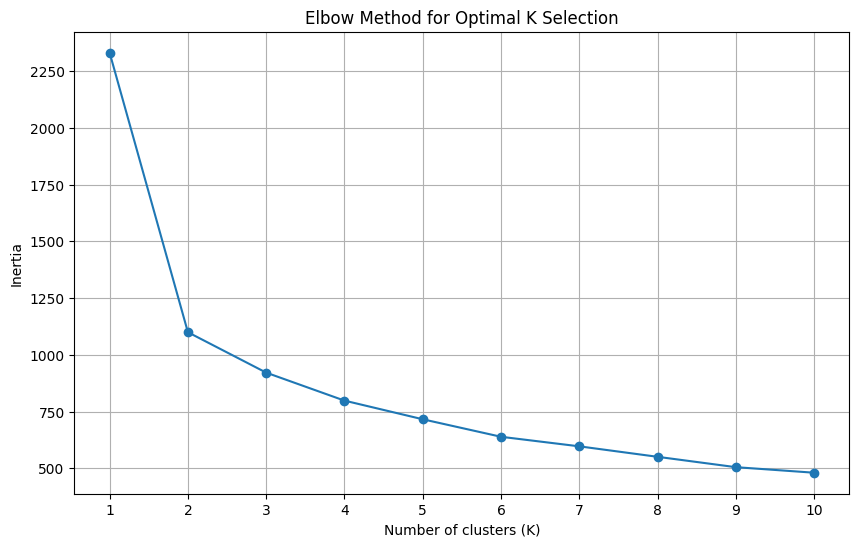

In [11]:
# Use Elbow Method to find optimal number of clusters
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K Selection')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [12]:
# Validate with Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.3f}")

# Find best K
best_k = range(2, 11)[np.argmax(silhouette_scores)]
print(f"Optimal K based on silhouette score: {best_k}")

K=2: Silhouette Score = 0.485
K=3: Silhouette Score = 0.397
K=4: Silhouette Score = 0.278
K=5: Silhouette Score = 0.259
K=6: Silhouette Score = 0.256
K=7: Silhouette Score = 0.250
K=8: Silhouette Score = 0.238
K=9: Silhouette Score = 0.258
K=10: Silhouette Score = 0.249
Optimal K based on silhouette score: 2


In [14]:
# Apply K-Means with optimal K
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Add clusters to dataframe
df['cluster'] = clusters

print("K-Means clustering completed with", optimal_k, "clusters")
print("Cluster distribution:")
print(df['cluster'].value_counts())

K-Means clustering completed with 2 clusters
Cluster distribution:
cluster
1    168
0    135
Name: count, dtype: int64


In [15]:
# Compare clusters with actual heart disease labels
comparison = pd.crosstab(df['cluster'], df['target'], 
                        rownames=['Cluster'], 
                        colnames=['Actual Heart Disease'])

print("Cluster Assignment vs Actual Diagnosis:")
print(comparison)

# Calculate statistical alignment
alignment_score = adjusted_rand_score(y, clusters)
print("Adjusted Rand Score:", round(alignment_score, 3))

Cluster Assignment vs Actual Diagnosis:
Actual Heart Disease    0    1
Cluster                       
0                      34  101
1                     130   38
Adjusted Rand Score: 0.273


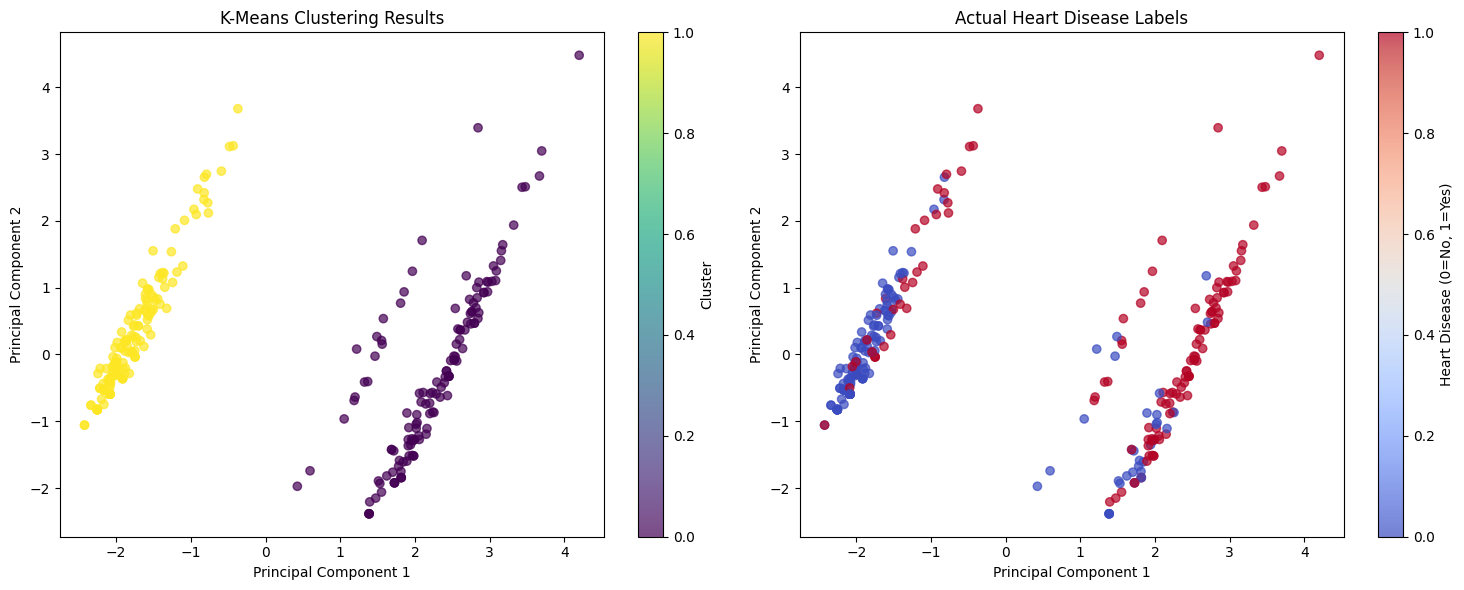

Variance explained: [0.55544399 0.16990352]


In [16]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-Means clusters
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('K-Means Clustering Results')
fig.colorbar(scatter1, ax=ax1, label='Cluster')

# Actual labels
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('Actual Heart Disease Labels')
fig.colorbar(scatter2, ax=ax2, label='Heart Disease (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

print("Variance explained:", pca.explained_variance_ratio_)

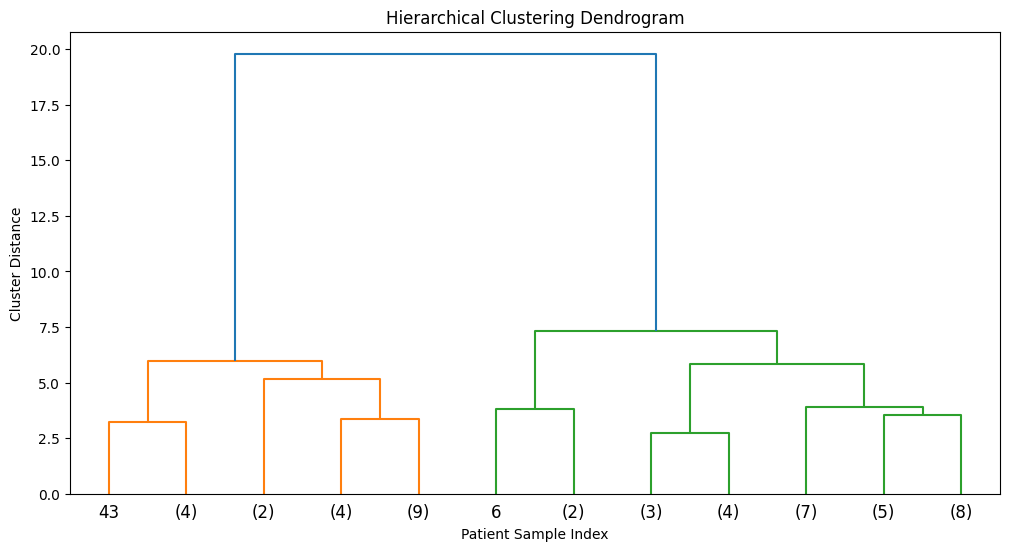

In [17]:
# Create dendrogram for hierarchical clustering
plt.figure(figsize=(12, 6))

# Use subset for clearer visualization
sample_indices = np.random.choice(len(X), size=50, replace=False)
X_sample = X.iloc[sample_indices]

# Generate linkage matrix
Z = linkage(X_sample, method='ward')

# Plot dendrogram
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patient Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

In [18]:
# Save the clustered dataset
df.to_csv('../data/heart_disease_clustered.csv', index=False)
print("Clustered dataset saved")

print("Unsupervised learning phase completed successfully")
print("Key findings: Discovered high-risk and low-risk patient groups")

Clustered dataset saved
Unsupervised learning phase completed successfully
Key findings: Discovered high-risk and low-risk patient groups


In [19]:
# Save the clustering models as required by the deliverable
import joblib

# 1. Save K-Means model
joblib.dump(kmeans, '../models/kmeans_cluster_model.pkl')
print("K-Means clustering model saved as 'kmeans_cluster_model.pkl'")

# 2. Save PCA model for visualization
pca_model = PCA(n_components=2)
pca_model.fit(X)
joblib.dump(pca_model, '../models/pca_model.pkl')
print("PCA model saved as 'pca_model.pkl'")

# 3. Save the fitted data with clusters
df.to_csv('../data/heart_disease_clustered.csv', index=False)
print("Clustered dataset saved as 'heart_disease_clustered.csv'")

print("All clustering models and results saved successfully!")

K-Means clustering model saved as 'kmeans_cluster_model.pkl'
PCA model saved as 'pca_model.pkl'
Clustered dataset saved as 'heart_disease_clustered.csv'
All clustering models and results saved successfully!
